# 주성분분석법 (Principal Component Analysis : PCA)

### 차원의 저주 (Curse of dimensionality)

다변량 자료분석시 차원의 증가에 따라 발생하는 문제들을 말함

**Example : 3 클래스 패턴인식문제**

1. 특징공간을 일정한 구역으로 나누기 
2. 각 구역에 속한 각 클래스 샘플들의 비를 구하기 
3. 새로운 샘플에 대하여, 해당하는 구역을 찾아 그 구역에서 우세한 클래스로 선택하기 (e.g. k-NNR 확률밀도추정에 의한 베이즈 분류기)

**1개의 특징**을 사용하면 아래와 같이 1차원 축을 세 부분으로 나누게 될 때, 너무 많은 부분에서 클래스들이 겹치게 됨

<img src="images/1d.png" width="180" >

**2개의 특징**을 사용하면 bin 의 개 수는 9개로 증가하게 되어,
1. 각 bin 마다 포함되는 표본의 개수를 일정하게 하던지 (표본 수가 1차원의 9개에서 2차원의 27개로 증가) 또는
2. 1차원의 경우와 같은 수의 표본을 유지하던지를 (매우 희박한 2차원 분포) 선택을 해야 한다. 

<img src="images/2d.png" width="400" >

**3 개의 특징** 을 사용하게 되면 문제는 더욱 심각하다. bin 의 개 수는 $3^3=27$ 개가 되고,
1. bin 마다 같은 표본 밀도를 유지하고 싶으면 81개의 표본이 필요하며, 
2. 같은 수의 표본을 사용하면 너무 많은 bin 들이 비어있게 된다.

<img src="images/3d.png" width="230">

**벡터의 차원이 높아짐에 따라 생길 수 있는 문제점들**
* 특징이 많으면 잡음 특징들까지 포함되므로 오히려 분류에 상처를 줄 뿐이다.
* 특징이 많으면 패턴 분류기에 의한 학습과 인식 속도가 느려진다.
* 특징이 많으면 모델링에 필요한 학습 집합의 크기가 커진다. 

실제로 “차원의 저주”는 주어진 표본의 크기에서 (i.e. 일정한 수의 학습 자료의 경우)  분류기의 성능을 개선하기 보다는 감소시키는 최대 특징 수가 존재함을 의미한다.

<img src="images/performance.png"  width="300" >

**차원의 저주를 극복하기 위해서는**
1. 사전지식을 활용하거나
2. 타겟 함수의 smoothness를 증가시키거나
3. 차원을 줄인다.


### 차원 축소의 두 가지 방법
* **특징선택 (feature selection)** : 전체 특징들로부터 부분집합을 선택함 ( $N > M$ )

\begin{gather}
\begin{bmatrix}
       x_1 \\
       x_2 \\
       \vdots \\
       \vdots \\
       x_N
\end{bmatrix}
\rightarrow
\text{feature selection}
\rightarrow
\begin{bmatrix}
       x_{i_1} \\
       x_{i_2} \\
       \vdots \\
       x_{i_M}
\end{bmatrix}
\end{gather}

* **특징추출 (feature extraction)** : 기존의 특징들의 조합으로 구성된 적으 개수의 새로운 특징들의 부분집합을 생성함. 

\begin{gather}
\begin{bmatrix}
       x_1 \\
       x_2 \\
       \vdots \\
       \vdots \\
       x_N
\end{bmatrix}
\rightarrow
\text{feature extraction}
\rightarrow
\begin{bmatrix}
       y_1 \\
       y_2 \\
       \vdots \\
       y_M
\end{bmatrix}
=f \left(
\begin{bmatrix}
       x_1 \\
       x_2 \\
       \vdots \\
       \vdots \\
       x_N
\end{bmatrix}
\right)
\end{gather}


* 특징추출의 문제는 주어진 특징공간 $x_i \in R^N$ 에서 $  N>M $ 인 매핑 $y = f(x) : R^N \rightarrow R^M$을 찾는 것이다. 이 때 변환된 특징 벡터 $y_i \in R^M$ 는 $R^N$의 정보 또는 구조의 대부분을 보존하고 있어야 한다.


* 최적의 매핑 $y=f(x)$ 는 비선형 함수일 수 있지만, 이러한 비선형함수를 만들 체계적인 방법이 없으므로, 특징 추출에서는 $y=Wx$ 와 같은 선형변환으로 국한한다.


\begin{gather}
\begin{bmatrix}
       x_1 \\
       x_2 \\
       \vdots \\
       \vdots \\
       x_N
\end{bmatrix}
\rightarrow
\text{linear feature extraction}
\rightarrow
\begin{bmatrix}
       y_1 \\
       y_2 \\
       \vdots \\
       y_M
\end{bmatrix}
= \begin{bmatrix}
       w_{11} &  w_{12}  & \dots  &  w_{1N}  \\
       w_{21} &  w_{22}  & \dots  &  w_{2N} \\
       \vdots & \vdots & \ddots   & \vdots  \\
        w_{M1} &  w_{M2}  & \dots  &  w_{MN} 
\end{bmatrix}
\begin{bmatrix}
       x_1 \\
       x_2 \\
       \vdots \\
       \vdots \\
       x_N
\end{bmatrix}
\end{gather}



### 특징추출에 의한 차원축소

특징추출 매핑 $y=f(x)$의 선택은 우리가 최적화시키고자 하는 목적에 의해서 결정되며, 크게 두 가지 방법이 있다.

* **신호표현 (Signal Representation)**: 특징추출 매핑의 목적이 낮은 차원공간에서 정확하게 표현하고자 함일 경우 $\rightarrow$ **주성분분석법 (PCA: Principal Components Analysis)**


* **분류 (Classification)**: 특징추출매핑의 목적이 낮은 차원에서의 클래스 구분을 증대하고자 함일 경우 $\rightarrow$ **선형판별분석법 (LDA: Linear Discriminant Analysis)**

<img src="images/feature-extraction.png"  width="300" >

## (Review) 고유값과 고유벡터 

정방 행렬 A 에 대해 다음 식을 만족하는 영벡터가 아닌 벡터 $v$, 실수 $\lambda$를 찾을 수 있다고 가정하자.

$$ Av=\lambda v $$

위 식을 만족하는 실수 $\lambda$ 를 고유값(eigenvalue), 벡터 $v$ 를 고유벡터(eigenvector)라고 한다. 고유값과 고유벡터를 찾는 작업을 고유분해(eigen-decomposition) 또는 고유값 분해(eigenvalue decomposition)라고 한다.

행렬 $A$ 의 고유벡터는 행렬 $A$ 를 곱해서 변환을 해도 방향이 바뀌지 않는 벡터다. 고유값은 변환된 고유벡터와 원래 고유벡터의 크기 비율이다.

예를 들어, 다음과 같은 벡터 $ v = [3, 2]^T$는 주어진 행렬의 고유벡터, 그리고 그에 해당하는 고유값은 $\lambda = 4$라고 한다.

$$ Av = \begin{bmatrix} 2 & 3 \\ 2 & 1 \end{bmatrix} \times \begin{bmatrix} 3 \\ 2 \end{bmatrix} = \begin{bmatrix} 12 \\ 8 \end{bmatrix} = 4 \times \begin{bmatrix} 3 \\ 2 \end{bmatrix} = \lambda v$$

어떤 벡터 $v$ 가 고유벡터가 되면 이 벡터에 실수를 곱한 벡터 $cv$ ,즉 $v$ 와 방향이 같은 벡터는 모두 고유벡터가 된다.

$$ A(cv) = cAv = c \lambda v = \lambda(cv)$$

그래서 보통 고유벡터를 표시할 때는 길이가 1인 단위벡터가 되도록 다음처럼 정규화(normalization)를 한다.

$$ { v \over \parallel v \parallel }$$

따라서 위 행렬 $A$ 의 고유값-고유벡터는 보통 다음처럼 나타낸다.

$$λ=4, \quad v = \begin{bmatrix} 3 \over \sqrt{13} \\ 2 \over \sqrt{13} \end{bmatrix} = \begin{bmatrix} 0.8321 \\ 0.5547 \end{bmatrix}$$


In [2]:
import numpy as np
#
# numpy의 linalg 서브패키지에서는 고유값과 고유벡터를 구할 수 있는 
# eig() 명령을 제공한다. 고유값은 벡터의 형태로, 고유벡터는 행렬의 형태로 묶여서 나오고, 
# 고유벡터는 크기가 1인 단위벡터로 정규화가 되어 있다. 
# 고유벡터 행렬은 행이 아니라 열을 고유벡터로 가진다는 점에 주의한다.
#
A = np.array([[2,3],[2,1]])
v, U = np.linalg.eig(A)
print(' eigenvalues : ',v)
print(' eigenvector for',v[0]," : ",U[:,0],
      '\n eigenvector for',v[1]," : ",U[:,1])

 eigenvalues :  [ 4. -1.]
 eigenvector for 4.0  :  [0.83205029 0.5547002 ] 
 eigenvector for -1.0  :  [-0.70710678  0.70710678]


**고유값의 개수** : $N$ 차방정식이 항상 $N$ 개의 복소수 해를 가진다는 사실을 이용하면 $N$ 차원 정방행렬의 고유값의 개수에 대해 다음 정리가 성립한다.

[정리] 중복된 고유값을 각각 별개로 생각하고, 복소수인 고유값도 고려한다면  $N$ 차원 정방행렬의 고유값은 항상 $N$개이다.

**고유값과 대각합 (trace) / 행렬식 (determinant)** :어떤 행렬의 고유값이  $\lambda_1,\lambda_2,⋯,\lambda_N$ 이라고 하면 모든 고유값의 곱은 행렬식의 값과 같고 모든 고유값의 합은 대각합(trace)의 값과 같다.

$$ det(A)=\prod_{i=1}^N \lambda_i $$
$$ tr(A)= \sum_{i=1}^N \lambda_i $$

In [3]:
print("Trace of A : ",np.trace(A))
print("Sum of eigenvalues : ", sum(v))
print("Determinant of A : ", np.linalg.det(A))
print("Product of eigenvalues : ", np.product(v))

Trace of A :  3
Sum of eigenvalues :  3.0
Determinant of A :  -4.0
Product of eigenvalues :  -4.0


#### 대칭행렬을 랭크-1 행렬의 합으로 분해
$N$ 차원 대칭행렬 $A$ 는 다음처럼 $N$ 개의 랭크-1 행렬 $A_i=u_iu_i^T$  의 합으로 표시할 수 있다.

$$ 
\begin{align*}
A & = U\Lambda U^T \\
  & = \begin{bmatrix}
      | & | & \cdots & | \\
      u_1 & u_2 & \cdots & u_N \\
      | & | & \cdots & | \\
      \end{bmatrix}
      \begin{bmatrix}
      \lambda_1 & 0 & \cdots & 0 \\
      0 & \lambda_2 & \cdots & 0 \\
      \vdots & \vdots & \ddots & \vdots \\
      0 & 0 & \cdots & \lambda_N \\
      \end{bmatrix}
      \begin{bmatrix}
      -- u_1^T -- \\ -- u_2^T -- \\ \vdots \\ -- u_N^T --
      \end{bmatrix} \\
   & = \begin{bmatrix}
   | & | & \cdots & | \\
       \lambda_1u_1 & \lambda_2u_2 & \cdots & \lambda_Nu_N \\
       | & | & \cdots & | \\
      \end{bmatrix}
      \begin{bmatrix}
       -- u_1^T -- \\ -- u_2^T -- \\ \vdots \\ -- u_N^T --
\end{bmatrix}
\end{align*}
$$
따라서 $N$ 차원 대칭행렬 $A$ 는

$$ A = \sum_{i=1}^N\lambda_i u_i u_i^T =  \sum_{i=1}^N\lambda_i A_i = 
\lambda_1 A_1 + \lambda_2 A_2 + \cdots + \lambda_N A_N$$

In [7]:
A = np.array([[60., 30., 20.],
              [30., 20., 15.],
              [20., 15., 12.]])
v, U = np.linalg.eig(A)
u1 = U[:, 0:1]
u2 = U[:, 1:2]
u3 = U[:, 2:3]
A1 = np.outer(u1, u1.T)
A2 = np.outer(u2, u2.T)
A3 = np.outer(u3, u3.T)
print( v[0]*A1 + v[1]*A2 + v[2]*A3)

[[60. 30. 20.]
 [30. 20. 15.]
 [20. 15. 12.]]


* **정방행렬**의 경우 ($A \in R^{N\times N}$)

  - $\lambda$ 는 복소수(complex number)
  - $\lambda$ 는 $N$ 개
  - $ AU = UA $
  - $ tr(A) = \sum_{i=1}^N \lambda_i$
  - $ det(A) = \prod_{i=1}^N \lambda_i$
  
  
* **대칭행렬**의 경우 ($A^T = A$)

  - $\lambda$ 는 실수(real number)
  - $U^T = U^{-1}$
  - $A = U \Lambda U^T $
  - $ A = \sum_{i=1}^N \lambda_i v_i v_i^T $
  
  
* **공분산행렬**의 경우 ($A = X^T X$)

  - $\lambda_i \ge 0$ 모든 고유값이 0 이거나 양수

In [8]:
import numpy as np

M = np.array([[4,2],[2,3]])
v, U = np.linalg.eig(M)
print('eigenvalues : ',v)
print('eigenvectors : ',U.T)
np.dot(np.dot(U,np.diag(v)),U.T) 

eigenvalues :  [5.56155281 1.43844719]
eigenvectors :  [[ 0.78820544  0.61541221]
 [-0.61541221  0.78820544]]


array([[4., 2.],
       [2., 3.]])

## Derivation (Option)

PCA의 목적은 **고차원에서의 분산(흩어짐의 정도)을 가능하면 많이 유지하면서 차원을 줄이는 것**이다.
$x$를 정규직교하는 기저 벡터 $[\phi_1, \phi_2, \cdots, \phi_N]$ 들의 선형결합으로 표현되는 N-차원 무작위 벡터라 하자.

$$ x = \sum_{i=1}^N y_i\phi_i \quad \text{ where } \phi_i | \phi_j = 
\begin{cases}
0 & i\ne j \\
1 & i=j
\end{cases}
$$

만약에 기저벡터 $M (M<N)$개 만으로 $x$를 표현하려 한다면, 일부 성분 $[y_{M+1}, \cdots, y_N]$ 를 미리 정한 상수 $b_i$ 로 대체하면 된다.

$$ \hat{x}(M)= \sum_{i=1}^M y_i \phi_i + \sum_{i=M+1}^N b_i\phi_i $$

이 때, 표현 상에 오차는 다음과 같이 된다.

$$ \Delta x(M) = x - \hat{x}(M) = \sum_{i=1}^N y_i \phi_i - \left(\sum_{i=1}^M y_i \phi_i + \sum_{i=M+1}^N b_i\phi_i \right) = \sum_{i=M+1}^M (y_i-b_i)\phi_i $$

이러한 표현상의 오차는 크기 $\Delta x$의 평균제곱의 형태로 측정할 수 있다.
우리의 목적은 이러한 평균제곱오차를 최소화 하는 기저벡터 $\phi_i$ 와 상수 $b_i$ 를 찾는 것이다.

$$ \bar{\epsilon}^2(M) = E\left [|\Delta x(M)|^2 \right ] = E\left [\sum_{i=M+1}^N \sum_{j=M+1}^N (y_i-b_i)(y_j-b_j)\phi_i^T \phi_j\right ] = \sum_{i=M+1}^N E \left [(y_i-b_i)^2 \right ]$$

여기에서, 최적의 상수 $b_i$ 는 목적함수의 미분을 제로로 하는 식으로부터 구할 수 있다.

$$ {\partial \over \partial b_i} E \left [ (y_i - b_i)^2 \right ] = -2 (E[y_i]-b_i) = 0 \Rightarrow E[y_i]$$

평균제곱오차는 다음과 같이 표현할 수 있다.

$$ \bar{\epsilon}^2(M) = \sum_{i=M+1}^N E\left [ (y_i-E[y_i])^2 \right ]
= \sum_{i=M+1}^N E \left [ (x\phi_i-E[x\phi_i])^T (x\phi_i-E[x\phi_i]) \right ]
= \sum_{i=M+1}^N \phi_i^T E\left [ (x-E[x])(x-E[x])^T \right ] \phi_i
= \sum_{i=M+1}^N \phi_i^T \Sigma_x \phi_i $$

여기에서 $y_i = x \phi_i$, 즉, i-번째 성분은 i-번째 기저벡터를 곱하여 얻어진다.

위의 표현을 최소화하면서 직교성을 갖는 해를 구하게 되며, 이를 위해서 라그랑제 승수(Lagrange Multiplier) $\lambda_i$ 를 포함시킨다.

$$\bar{\epsilon}^2(M) = \sum_{i=M+1}^N \phi_i^T \Sigma_x \phi_i + \sum_{i=M+1}^N \lambda_i (1 - \phi_i^T \phi_i) $$

기저 벡터에 대한 편미분을 계산하면

$$ {\partial \over \partial \phi_i} \bar{\epsilon}^2(M) =
 {\partial \over \partial \phi_i} \left [ \sum_{i=M+1}^N \phi_i^T \Sigma_x \phi_i + \sum_{i=M+1}^N \lambda_i (1 - \phi_i^T \phi_i) \right ] =
 2 (\Sigma_x \phi_i - \lambda_i \phi_i ) = 0 \Rightarrow \Sigma_x \phi_i = \lambda_i \phi_i $$
 
 Note $$ { d \over dx } (x^T A x ) = (A+A^T) x = \text { (if A is symmetric) } = 2Ax $$

따라서 $\phi_i, \lambda_i$ 는 공분산 행렬 $\Sigma_x$ 의 고유벡터와 고유치에 해당한다.

평균제곱오차를 다음과 같이 표현할 수 있다.

$$ \bar{\epsilon}^2(M) = \sum_{i=M+1}^N \phi_i^T \Sigma_x \phi_i =
\sum_{i=M+1}^N \phi_i^T \lambda_i \phi_i = \sum_{i=M+1}^N \lambda_i$$

이러한 크기를 최소화하기 위해서는 $\lambda_i$가 가장 작은 고유치어야 한다.
따라서, 최소한의 제곱오차로서 $x$를 표현하기 위해서는 가장 큰 고유치 $\lambda_i$에 해당하는 고유
벡터 $\phi_i$ 들을 선택해야 한다.

#### 주성분 분석의 의미

<img src="./images/pca-ex1.png" width="200">
(a) 특징벡터의 분포

<img src="./images/pca-ex2.png" width="100">


$$ \iff \Sigma = \begin{bmatrix} u_1 & u_2 \end{bmatrix} 
\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} \quad \text{where} \quad \lambda_1 > \lambda_2$$

<img src="./images/pca-ex3.png" width="200">
(b) PCA후 주축 변환 결과
<img src="./images/pca-ex4.png" width="200">
(c) 주축 $u_1$으로의 사영하여 1차원으로 축소한 결과
<img src="./images/pca-ex5.png" width="200">
(d) 주축 $u_2$으로의 사영하여 1차원으로 축소한 결과

<img src="./images/pca.gif" width="500">

* 주성분분석법은 다차원 특징벡터로 이루어진 데이터에 대하여 **고차원의 정보를 유지하면서 저차원으로 차원을 축소**하는 다변량 데이터처리방법 중의 하나다.


* 특징데이터는 특징벡터 차원의 수만큼 존재하는 기준축을 기준으로 표현되며, 3차원 데이터는 3개의 기준축을 기준으로 표현된다. 결국 차원을 축소한다는 의미는 이 기준축의 개수를 줄이는 것으로 생각할 수 있다. 10차원 데이터를 4차원으로 축소하려면 기준축을 10개에서 4개로 축소하면 된다는 이야기다. 따라서 **다변량 데이터의 주성분에 해당하는 주축을 통계적인 방법으로 구하고**, 이렇게 해서 얻은 **특징벡터 $x$ 를 주축방향으로 사영(projection)시킴으로써 차원을 축소**할 수 있는 것이다. 사영은 행렬의 내적을 이용해 쉽게 구할 수 있다.


* 주성분분석은 **상관(correlated)이 있는 변량들의 변동(분산)을 줄이는** 차원에서 **상관이 없는 변량의 집합으로 기준축을 변환**하여, **특징벡터를 재배치**하는 것을 말한다.



>**PCA 를 사용한 차원축소**
>
> $N$ 차원의 무작위 벡터 $x\in R^N$ 를 서로 독립인 $M(M<N)$개 벡터의 선형결합으로 근사시킬 **최적의 방법은 공분산 행렬 $\Sigma_x$ 의 가장 큰 고유값들 $\lambda_i$** 에 해당하는 **고유벡터들 $\phi_i$**에 무작위 벡터를 **사영(투영)**시킴으로 이룰 수 있다.

#### 주성분 분석을 통하여 변환행렬 구성 단계

1. $N$개의 $D$차원 자료들 $x_n$ 으로부터 공분산 행렬 $\Sigma$ (DxD)를 계산한다. (e.g. **C = numpy.cov(X)**)

$$ \mu= {1 \over N} \sum^N_{n=1}x_n , \quad \Sigma = { 1 \over N} \sum_{n=1}^N (x_n-\mu)(x_n-\mu)^T \quad \text{where N: No. of damples}$$

2. 고유값 분석을 행한다. (e.g. **v, U = numpy.linalg.eig(C)** )

$$ \Sigma = U\Lambda U^T = [ u_1 u_2 \cdots u_D] 
\begin{bmatrix} \lambda_1 & 0 & 0  \\ 0 & \ddots & 0 \\ 0 & 0 & \lambda_D \end{bmatrix}
[ u_1 u_2 \cdots u_D]^T$$


3. $D$개의 고유값들 중에서 가장 큰 고유값 $M(<D)$개인 $(\lambda_1, \cdots, \lambda_M)$ 을 선택한다. (e.g. **idx = numpy.argsort(v)** )


4. 선택된 고유값과 관련된 고유벡터를 구하고 연결하여 변환 행렬 $W$을 만든다. (e.g. **W = [ U[:,idx[D]:idx[D-M-1]]**)

$$ W = [u_1 \cdots u_M ]$$


5. 특징 벡터를 다음의 변환식으로 변환한다. (e.g. **y = numpy.dot(W.T, X)**)

$$ y = W^T x $$

### 주성분 분석법의 한계

* PCA는 공분산행렬의 고유벡터를 사용하기 때문에 유니모달(unimodal) 가우시안을 따르는 자료들에 있어서 서로 독립적인 축을 찾는데 사용될 수 있다. 즉, 가우시안이 아니거나 비선형인 멀티모달(multimodal) 패턴에는 적용하기가 곤란하다

<img src="./images/pca-limit.png" width="400">

* PCA의 주요한계는 특징벡터의 클래스 라벨을 고려하지 않기 때문에 클래스들의 구분성은 고려하지 않는다는 데 있다.


* PCA는 단순히 변환된 축이 최대분산방향과 정렬되도록 좌표회전을 수행하는 것이다.


* 따라서 최대분산방향이 특징 구분을 좋게 한다는 보장은 없는 것이다.


### PCA Example (1)

다음과 같은 파라미터를 갖는 3차원 가우시안 분포인 경우를 고려해 보자.
$$ \mu = \begin{bmatrix}0  \\ 5 \\ 2 \end{bmatrix} $$

$$ \Sigma =  \begin{bmatrix} 25 & -1 & 7  \\ -1 & 4 & -4 \\ 7 & -4 & 10 \end{bmatrix}
$$

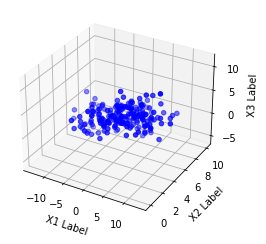

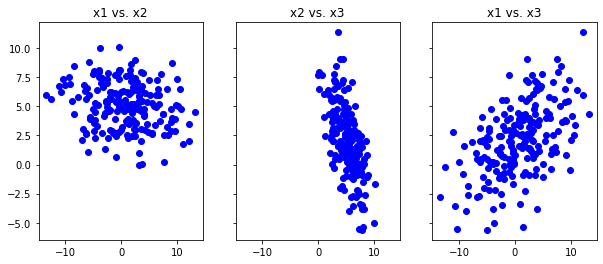

In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mu  = [0,5,2]
cov = [[25,-1,7], [-1,4,-4], [7,-4,10]]
gaussian = stats.multivariate_normal(mu, cov)
X = gaussian.rvs(200)

ax = plt.subplot(projection='3d')  # or ax = plt.gca(projection='3d') , ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c='b', marker='o')
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('X3 Label')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(10,4))
#fig.suptitle('Scatter plots for each different pair ')
ax1.scatter(X[:,0],X[:,1],c="b",marker='o')
ax1.set_title("x1 vs. x2")
ax2.scatter(X[:,1],X[:,2],c="b",marker='o')
ax2.set_title("x2 vs. x3")
ax3.scatter(X[:,0],X[:,2],c="b",marker='o')
ax3.set_title("x1 vs. x3")
plt.show()

[[27.68280602 -1.80458605  8.34320639]
 [-1.80458605  3.98408843 -3.85489471]
 [ 8.34320639 -3.85489471  9.23314181]]
[31.24610695  7.98884038  1.66508894]


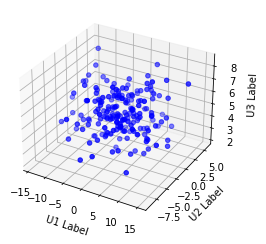

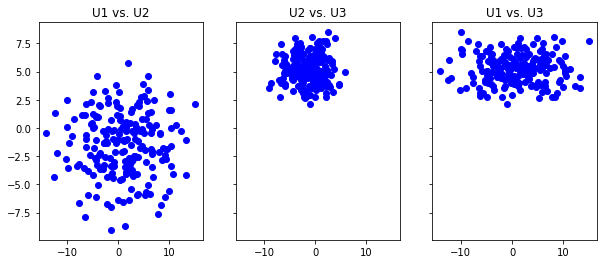

In [12]:
C = np.cov(X.T)
v,U = np.linalg.eig(C)
print(C) 
print(v)
Y = np.dot(X,U)

ax = plt.subplot(projection='3d')  # or ax = plt.gca(projection='3d') , ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[:,0], Y[:,1], Y[:,2], c='b', marker='o')
ax.set_xlabel('U1 Label')
ax.set_ylabel('U2 Label')
ax.set_zlabel('U3 Label')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(10,4))
#fig.suptitle('Scatter plots for each different pair ')
ax1.scatter(Y[:,0],Y[:,1],c="b",marker='o')
ax1.set_title("U1 vs. U2")
ax2.scatter(Y[:,1],Y[:,2],c="b",marker='o')
ax2.set_title("U2 vs. U3")
ax3.scatter(Y[:,0],Y[:,2],c="b",marker='o')
ax3.set_title("U1 vs. U3")
plt.show()

### PCA Example (2)
**Problem**  다음과 같이 주어지는 2차원 자료에 대한 주성분을 계산하시오.
 $$ X = [x_1, x_2] = \{(1,2), (3,3), (3,5), (5,4), (5,6), (6,5), (8,7), (9,8)\} $$

**Solution**
- 공분산 행렬
$ \sum_x = \left[
\begin{matrix}
6.25 & 4.25\\
4.25 & 3.5
\end{matrix}
\right] $


-  고유값(eigenvalue)은 다음과 같은 특성방정식이 0이 되는 경우이다.

$$ \Sigma_x v = \lambda v \Rightarrow |\Sigma_x - \lambda I | = 0 $$

$$ \left|
\begin{matrix}
6.25-\lambda & 4.25\\
4.25 & 3.5-\lambda
\end{matrix}
\right|
= 0 $$

$$\lambda_1=9.34  ,  \lambda_2=0.41 $$

- 고유백터가 이문제의 답이며, 다음과 같이 구한다.

$$ \left[
\begin{matrix}
6.25 & 4.25\\
4.25 & 3.5
\end{matrix}
\right]
\left[
\begin{matrix}
v_{11}\\
v_{12}
\end{matrix}
\right] = \left[
\begin{matrix}
\lambda_1 v_{11}\\
\lambda_1 v_{12}
\end{matrix}
\right] \Rightarrow
\left[
\begin{matrix}
v_{11}\\
v_{12}
\end{matrix}
\right] = \left[
\begin{matrix}
0.81\\
0.59
\end{matrix}
\right] $$

<br>

$$ \left[
\begin{matrix}
6.25 & 4.25\\
4.25 & 3.5
\end{matrix}
\right]
\left[
\begin{matrix}
v_{21}\\
v_{22}
\end{matrix}
\right] = \left[
\begin{matrix}
\lambda_2 v_{21}\\
\lambda_2 v_{22}
\end{matrix}
\right] \Rightarrow
\left[
\begin{matrix}
v_{21}\\
v_{22}
\end{matrix}
\right] = \left[
\begin{matrix}
-0.59\\
0.81
\end{matrix}
\right] $$


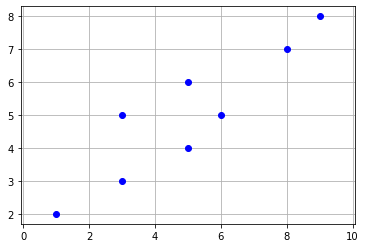

In [13]:
import matplotlib.pyplot as plt
X = [[1,3,3,5,5,6,8,9], [2,3,5,4,6,5,7,8]]
plt.plot(X[0], X[1], 'bo')
plt.axis('equal')
plt.grid()
plt.show()

In [14]:
cov = np.cov(X,bias=True).round(2)
print(cov)
v, U = np.linalg.eig(cov)
print(v.round(2))
print(U.round(2))

[[6.25 4.25]
 [4.25 3.5 ]]
[9.34 0.41]
[[ 0.81 -0.59]
 [ 0.59  0.81]]


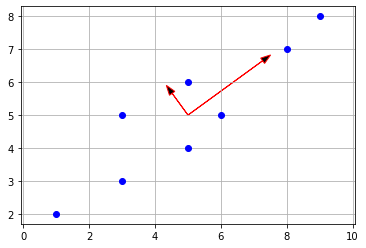

In [15]:
plt.plot(X[0], X[1], 'bo')
plt.arrow(5, 5, 0.3*v[0]*U[0,0], 0.3*v[0]*U[1,0], head_width=0.2, head_length=0.3, fc='k', ec='r')
plt.arrow(5, 5, 2*v[1]*U[0,1], 2*v[1]*U[1,1], head_width=0.2, head_length=0.3, fc='k', ec='r')
plt.axis('equal')
plt.grid()
plt.show()

### Scikit-learn 의 PCA 클래스

사이킷런의 decomposition 서브패키지는 PCA 분석을 위한 PCA 클래스를 제공한다. 사용법은 다음과 같다.

* 입력 인수:
  - `n_components` : 정수

* 메서드:
  - `fit_transform()` : 특징행렬을 낮은 차원의 근사행렬로 변환
  - `inverse_transform()` : 변환된 근사행렬을 원래의 차원으로 복귀

* 속성:
  - `mean_` : 평균 벡터
  - `components_` : 주성분 벡터

PCA vector :  [[-0.80864711 -0.58829402]]


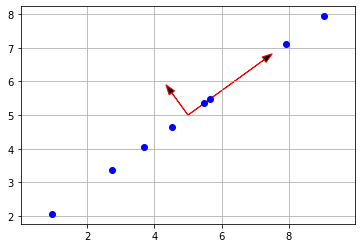

In [17]:
from sklearn.decomposition import PCA

Y = np.array(X)
pca = PCA(n_components=1)
Y_low = pca.fit_transform(Y.T)
print("PCA vector : ", pca.components_)
Y2 = pca.inverse_transform(Y_low)
plt.plot(Y2[:,0], Y2[:,1], 'bo')
plt.arrow(5, 5, 0.3*v[0]*U[0,0], 0.3*v[0]*U[1,0], head_width=0.2, head_length=0.3, fc='k', ec='r')
plt.arrow(5, 5, 2*v[1]*U[0,1], 2*v[1]*U[1,1], head_width=0.2, head_length=0.3, fc='k', ec='r')
plt.axis('equal')
plt.grid()
plt.show()

[references]
* https://datascienceschool.net/02%20mathematics/03.05%20PCA.html
